In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline 

In [3]:
telco_df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
insight = []

for col in telco_df.columns:
    if telco_df.loc[:, col].nunique() <= 5:
        # Append the column name, number of unique values, unique values, and data type to the insight
        insight.append([col, telco_df.loc[:, col].nunique(), telco_df.dtypes[col]])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the insight
        insight.append([col, telco_df.loc[:, col].nunique(), telco_df.dtypes[col]])

insight_df=pd.DataFrame(insight,columns=['Column','Unique_Values','Data_Types'])
print(insight_df)


              Column  Unique_Values Data_Types
0         customerID           7043     object
1             gender              2     object
2      SeniorCitizen              2      int64
3            Partner              2     object
4         Dependents              2     object
5             tenure             73      int64
6       PhoneService              2     object
7      MultipleLines              3     object
8    InternetService              3     object
9     OnlineSecurity              3     object
10      OnlineBackup              3     object
11  DeviceProtection              3     object
12       TechSupport              3     object
13       StreamingTV              3     object
14   StreamingMovies              3     object
15          Contract              3     object
16  PaperlessBilling              2     object
17     PaymentMethod              4     object
18    MonthlyCharges           1585    float64
19      TotalCharges           6531     object
20           

In [21]:
telco_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Senior Citizen column should be a categorical feature.

<AxesSubplot:>

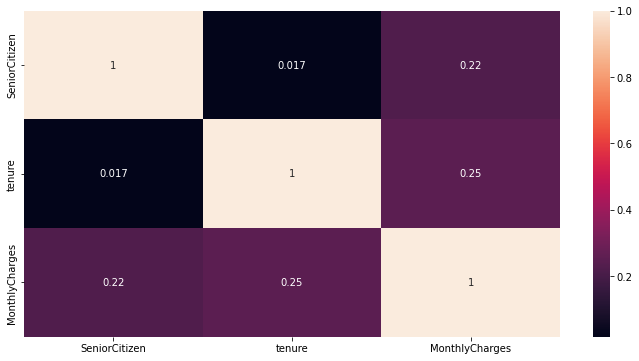

In [31]:
corr_data=telco_df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_data,annot=True)

In [123]:
telco_df['SeniorCitizen']=telco_df['SeniorCitizen'].replace({1 :'Yes',0:'No'})

In [125]:
cat_cols= []

for i in telco_df.columns:
    unique_val=telco_df[i].nunique()
    if unique_val<=5:
        cat_cols.append(i)

In [126]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [127]:
cat_cols.remove('Churn')

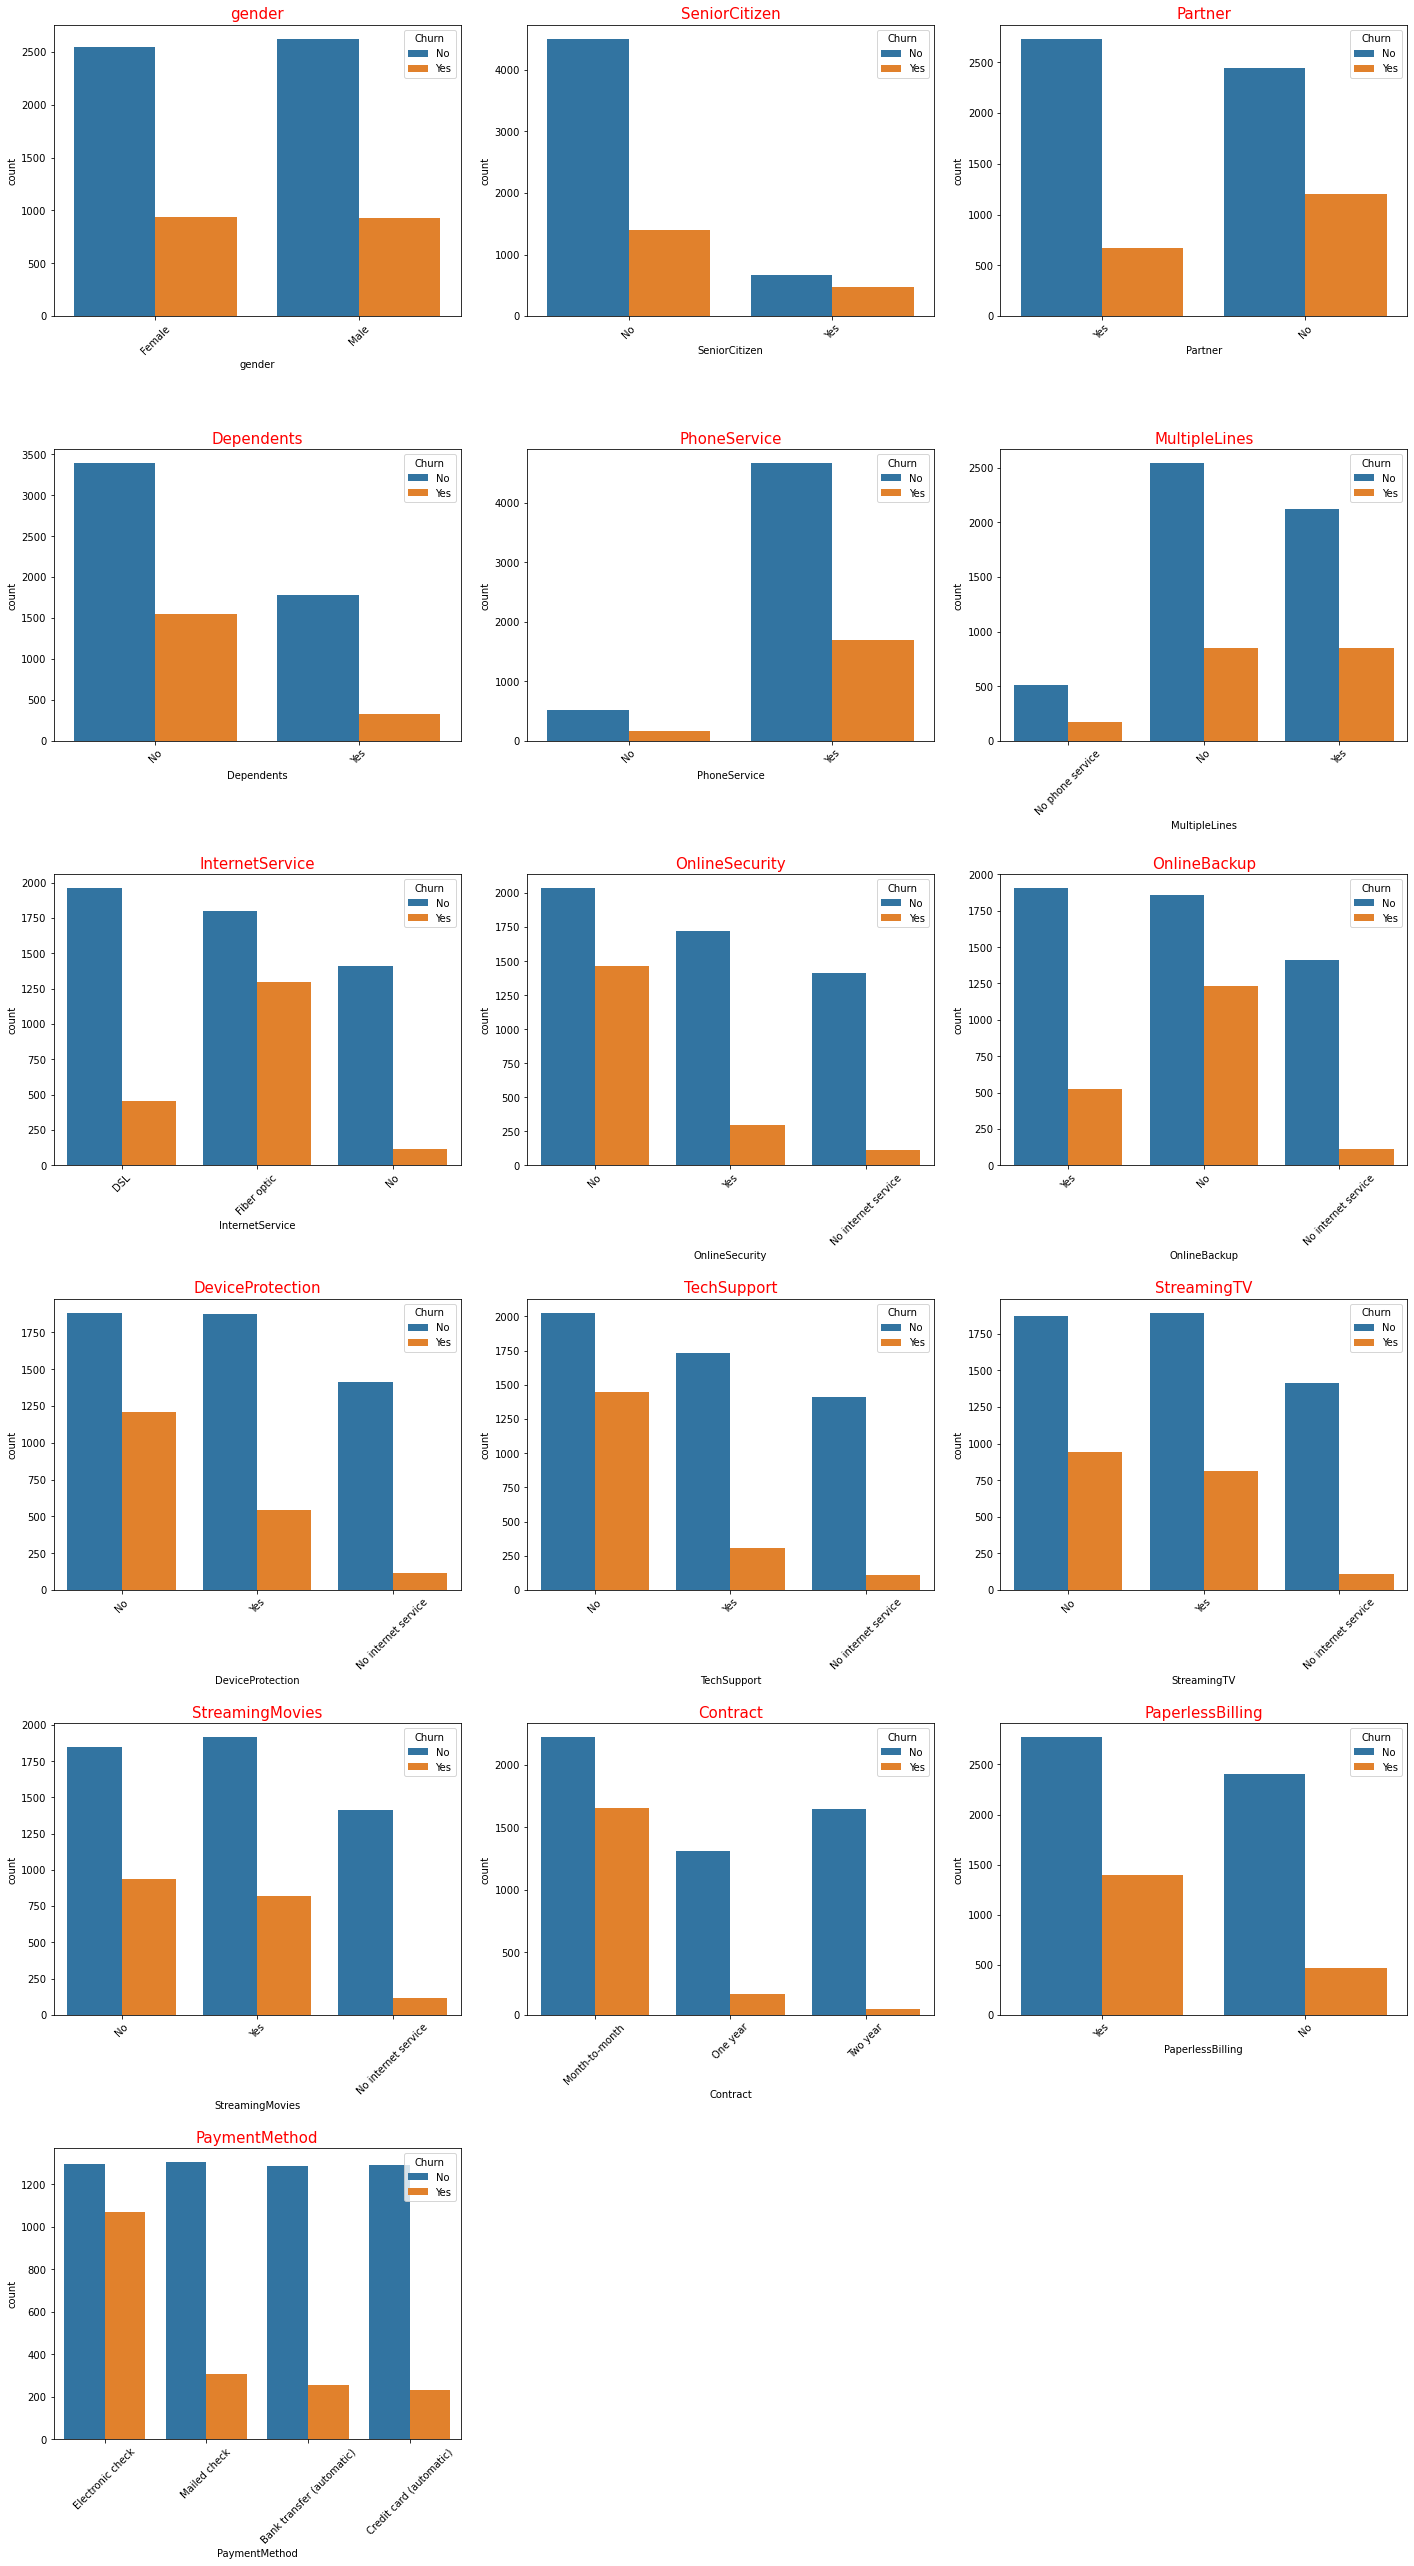

In [128]:

# Calculate the number of rows needed based on the number of category columns
num_rows = (len(cat_cols) + 2) // 3  # Round up division

# Create subplots with three columns
fig, axs = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through each category column and create a countplot in the corresponding subplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=telco_df, x=col, ax=axs[i],hue='Churn')
    axs[i].set_title(col, fontsize=15, color="red")
    axs[i].tick_params(axis='x', rotation=45)  

  
    
# Remove empty subplots if the number of category columns is not divisible by 3
if len(cat_cols) % 3 != 0:
    for j in range(len(cat_cols) % 3, 3):
        fig.delaxes(axs[-j])

plt.tight_layout(pad=2.0)
plt.show()
